# **Epidemiology**

Paper: https://academic.oup.com/jrsssb/article/85/4/1173/7218445?login=false#419282247

Title: __"Consistent and fast inference in compartmental models of
epidemics using Poisson Approximate Likelihoods"__

Authors:

- Michael Whitehouse, School of Mathematics, University of Bristol
- Nick Whiteley, School of Mathematics, University of Bristol
- Lorenzo Rimella, Department of Mathematics and Statistics, Lancaster University

Interesting approximation scheme for compartment models (which are popular in Epidemiology). Specifically, you may look at their first example (influenza in Wales)

## Import packages

In [2]:
!pip install particles

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.5/670.5 kB 14.0 MB/s eta 0:00:00


In [9]:
import particles
import particles.state_space_models as ssm
import particles.distributions as dists
import numpy as np
import matplotlib.pyplot as plt

## To understand Bootstrap Filtering

In [6]:
class ToySSM(ssm.StateSpaceModel):
    def PX0(self):  # Distribution of X_0
        return dists.Normal()  # X_0 ~ N(0, 1)
    def PX(self, t, xp):  # Distribution of X_t given X_{t-1}
        return dists.Normal(loc=xp)  # X_t ~ N( X_{t-1}, 1)
    def PY(self, t, xp, x):  # Distribution of Y_t given X_t (and X_{t-1})
        return dists.Normal(loc=x, scale=self.sigma)  # Y_t ~ N(X_t, sigma^2)

my_model = ToySSM(sigma=0.2)
x, y = my_model.simulate(200)  # sample size is 200

alg = particles.SMC(fk=ssm.Bootstrap(ssm=my_model, data=y), N=200, verbose=True)
alg.run()

t=0: resample:False, ESS (end of iter)=33.79
t=1: resample:True, ESS (end of iter)=34.71
t=2: resample:True, ESS (end of iter)=61.95
t=3: resample:True, ESS (end of iter)=50.01
t=4: resample:True, ESS (end of iter)=28.45
t=5: resample:True, ESS (end of iter)=30.60
t=6: resample:True, ESS (end of iter)=59.66
t=7: resample:True, ESS (end of iter)=28.73
t=8: resample:True, ESS (end of iter)=34.93
t=9: resample:True, ESS (end of iter)=53.12
t=10: resample:True, ESS (end of iter)=53.44
t=11: resample:True, ESS (end of iter)=20.22
t=12: resample:True, ESS (end of iter)=30.63
t=13: resample:True, ESS (end of iter)=32.20
t=14: resample:True, ESS (end of iter)=39.88
t=15: resample:True, ESS (end of iter)=62.65
t=16: resample:True, ESS (end of iter)=55.52
t=17: resample:True, ESS (end of iter)=49.19
t=18: resample:True, ESS (end of iter)=57.45
t=19: resample:True, ESS (end of iter)=32.24
t=20: resample:True, ESS (end of iter)=52.60
t=21: resample:True, ESS (end of iter)=6.20
t=22: resample:True,

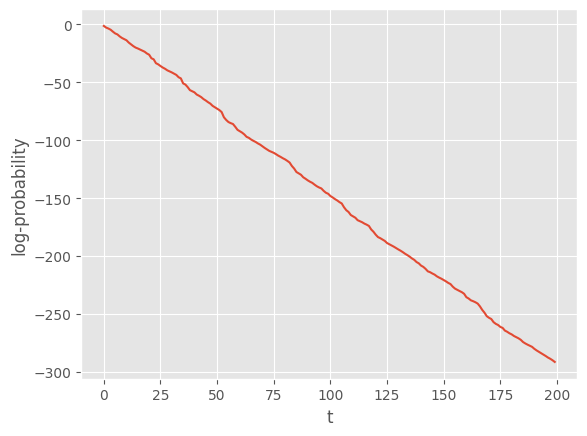

In [10]:
plt.style.use('ggplot')
plt.plot(alg.summaries.logLts)
plt.xlabel('t')
plt.ylabel(r'log-probability');

## 1. Implement a bootstrap filter for this model

## 2. Implement the PAL approximation algorithm

## 3. Compare the two in terms of how well they approximate the (log-)likelihood at a given theta; you can choose a "reasonable" theta based on their result.

## 4. Perform parameter estimation using either

 (a) a PMCMC or SMC^2 algorithm based on the bootstrap filter; or

 (b) a MCMC sampler that replaces the likelihood by its PAM approximation.



Note that the authors do (b) with Stan, but that may be too time-consuming for you; it might be better to resort to a simpler MCMC scheme, such as random walk Metropolis.


## 5. If time permits, try to do both (a) and (b) and compare your results with those of the paper.